https://www.science-emergence.com/Codes/Plot-CloudSat-radar-reflectivity-using-python-and-matplotlib/

In [1]:
from pyhdf.SD import SD, SDC # To read a HDF file (SD data)
from pyhdf.HDF import *
from pyhdf.VS import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab

In [2]:
#---------- bits_stripping Function ----------#

def bits_stripping(bit_start,bit_count,value):
	bitmask=pow(2,bit_start+bit_count)-1
	return np.right_shift(np.bitwise_and(value,bitmask),bit_start)

In [3]:
year_month = 201612
targetfolder = '../../Data/CloudSat/2C_Precip/%s/' %year_month

In [8]:
import pprint

In [10]:

#---------- Read HDF Files (VD data) ----------#

f = HDF(targetfolder+'2016358111138_56684_CS_2C-SNOW-PROFILE_GRANULE_P_R04_E06.hdf') 
vs = f.vstart() 
data_info_list = vs.vdatainfo()
#pprint.pprint(data_info_list)

Latitude = vs.attach('Latitude')
Longitude = vs.attach('Longitude')

a = Latitude[:]

Latitude.detach() # "close" the vdata
Longitude.detach() # "close" the vdata
vs.end() # terminate the vdata interface
f.close() 

[('Profile_time', '', 7, 20678, 1, 0, 4, 1962, 0),
 ('UTC_start', '', 8, 1, 1, 0, 4, 1962, 0),
 ('TAI_start', '', 9, 1, 1, 0, 8, 1962, 0),
 ('Latitude', '', 10, 20678, 1, 0, 4, 1962, 0),
 ('Longitude', '', 11, 20678, 1, 0, 4, 1962, 0),
 ('DEM_elevation', '', 13, 20678, 1, 0, 2, 1962, 0),
 ('Vertical_binsize', '', 14, 1, 1, 0, 4, 1962, 0),
 ('Data_quality', '', 15, 20678, 1, 0, 1, 1962, 0),
 ('Data_status', '', 16, 20678, 1, 0, 1, 1962, 0),
 ('Data_targetID', '', 17, 20678, 1, 0, 1, 1962, 0),
 ('snow_retrieval_status', '', 18, 20678, 1, 0, 1, 1962, 0),
 ('norm_chi_square', '', 19, 20678, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc', '', 32, 20678, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc_uncert', '', 33, 20678, 1, 0, 4, 1962, 0),
 ('snowfall_rate_sfc_confidence', '', 34, 20678, 1, 0, 1, 1962, 0),
 ('nray:2C-SNOW-PROFILE', 'DimVal0.1', 203, 1, 1, 0, 4, 1962, 0),
 ('nbin:2C-SNOW-PROFILE', 'DimVal0.1', 205, 1, 1, 0, 4, 1962, 0)]


In [14]:
#---------- Read HDF Files ----------#

cpr_2b_geoprof = SD(targetfolder+'2016358111138_56684_CS_2C-SNOW-PROFILE_GRANULE_P_R04_E06.hdf', SDC.READ)
datasets_dic = cpr_2b_geoprof.datasets()

sds_dic = {}
for key, value in datasets_dic.items():
    sds_dic[value[3]] = key
pprint.pprint( sds_dic)

{0: 'Height',
 1: 'snowfall_rate',
 2: 'snowfall_rate_uncert',
 3: 'log_N0',
 4: 'log_N0_uncert',
 5: 'log_lambda',
 6: 'log_lambda_uncert',
 7: 'snow_water_content',
 8: 'snow_water_content_uncert'}


In [15]:
cpr_2b_geoprof_height = cpr_2b_geoprof.select('Height')
#cpr_2b_geoprof_cloud_mask = cpr_2b_geoprof.select('CPR_Cloud_mask')
#cpr_2b_geoprof_radar_reflectivity = cpr_2b_geoprof.select('Radar_Reflectivity')
cpr_2b_geoprof_snow_water_content = cpr_2b_geoprof.select('snow_water_content')

cpr_2b_geoprof_height_data = cpr_2b_geoprof_height.get()
#cpr_2b_geoprof_cloud_mask_data = cpr_2b_geoprof_cloud_mask.get()
#cpr_2b_geoprof_radar_reflectivity_data = cpr_2b_geoprof_radar_reflectivity.get()
cpr_2b_geoprof_snow_water_content_data = cpr_2b_geoprof_snow_water_content.get()

In [17]:
cpr_2b_geoprof_snow_water_content_data.max()

0.50061285

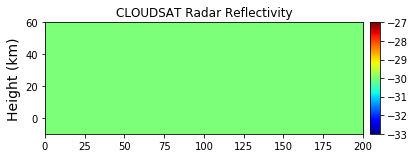

In [19]:
fillvalue = 15360
missing = -8888

img = np.zeros((800,125))
img.fill(-30)

#for i in np.arange(800):
 #   for j in np.arange(125):
  #      k = int( 125 * (cpr_2b_geoprof_height_data[i,j] + 5000) / 35000 )
   #     if cpr_2b_geoprof_radar_reflectivity_data[i,j] > -3000 and \
    #                cpr_2b_geoprof_radar_reflectivity_data[i,j] < 2100:
     #       img[i,k] = cpr_2b_geoprof_radar_reflectivity_data[i,j] / 100

ax = plt.subplot(111)
im = ax.imshow(img.T, interpolation='bilinear', cmap=cm.jet, origin='lower', extent=[0,200,-10,60])

plt.title( 'CLOUDSAT Radar Reflectivity' )

plt.ylabel('Height (km)',fontsize=14)
#pylab.yticks([-10,0,10,20,30,40,50,60], [-5,0,5,10,15,20,25,30])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.10)
plt.colorbar(im, cax=cax)

#plt.savefig("cloudsat_radar_reflectivity.png")
plt.show()

In [20]:
img

array([[-30., -30., -30., ..., -30., -30., -30.],
       [-30., -30., -30., ..., -30., -30., -30.],
       [-30., -30., -30., ..., -30., -30., -30.],
       ...,
       [-30., -30., -30., ..., -30., -30., -30.],
       [-30., -30., -30., ..., -30., -30., -30.],
       [-30., -30., -30., ..., -30., -30., -30.]])